In [17]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

#getting the data set
data=pd.read_csv('brain_stroke.csv',index_col=0)
data.head(-5)
#print(data)
#print(data.isna().sum())
#print(data.info())

# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Instantiating LabelEncoder
le=LabelEncoder()
# Iterating over all the values of each column and extract their dtypes
for col in data.columns.to_numpy():
    # Comparing if the dtype is object
    if data[col].dtypes in ('object','category'):
    # Using LabelEncoder to do the numeric transformation
        data[col]=le.fit_transform(data[col].astype(str))


#establishing the training set and the test set
x=data.drop(["stroke"],axis=1)
y=data["stroke"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)
x_train.shape, x_test.shape

# Normalize feature data
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define decay schedule for simuladed annealing
schedule = mlrose_hiive.ExpDecay()

import time
startTime = time.time()
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [100], activation ='relu', schedule=schedule,
                                 algorithm ='simulated_annealing', curve=True,
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.01, early_stopping = True, 
                                 clip_max = 50, max_attempts = 1000, random_state = 42)

nn_model1.fit(x_train_scaled, y_train)
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(x_train_scaled)

y_train_accuracy = accuracy_score(y_train, y_train_pred)
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Execution time in seconds: 12.452356576919556


In [13]:
loss_curve=nn_model1.fitness_curve[:,0]

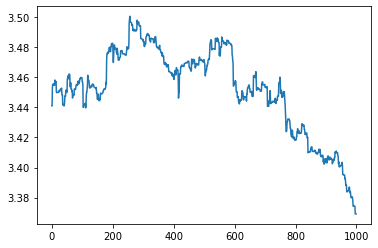

In [14]:
plt.plot(loss_curve)

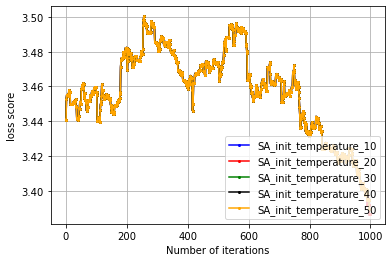

In [16]:
list_temperature=[10,20,30,40,50]
for i in list_temperature:
    nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [100], activation ='relu', schedule=mlrose_hiive.ExpDecay(init_temp=i),
                                 algorithm ='simulated_annealing', curve=True,
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.01, early_stopping = True, 
                                 clip_max = 400, max_attempts = 1000, random_state = 42)
    nn_model1.fit(x_train_scaled, y_train)
    if i==10:
        color='blue'
    if i==20:
        color='red'
    if i==30:
        color='green'
    if i==40:
        color='black'
    if i==50:
        color='orange'
    loss_curve=nn_model1.fitness_curve[:,0]
    plt.plot(loss_curve,marker='o', markersize=2,color=color, label=('SA_init_temperature_'+str(i)))
    plt.xlabel('Number of iterations')
    plt.ylabel('loss score')
    plt.legend(loc='lower right')
    plt.grid()
plt.show()